In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Import training set
train = pd.read_excel("train_data-1578037482430.xlsx",na_values='unknown')
#Import test set
test =  pd.read_excel("test_data-1578037501169.xlsx",na_values='unknown')

In [3]:
train=train.drop(['CustomerID','CustomerName'],axis=1)

In [4]:
#Age in years
train["Age"]=((2020-train["yearofBirth"])*365+(train["monthofBirth"]-1)*30+train["dayofBirth"])/365
train["Age"].head()

0    40.361644
1    34.980822
2    21.884932
3    51.263014
4    27.452055
Name: Age, dtype: float64

In [5]:
#tenure
train["tenure"]=((2020-train["yearofEntry"])*365+(train["monthofEntry"]-1)*30+train["dayofEntry"])/365
train["tenure"].head()

0    6.898630
1    9.621918
2    7.928767
3    5.936986
4    8.767123
Name: tenure, dtype: float64

In [6]:
train=train.drop(['yearofBirth','monthofBirth','dayofBirth','yearofEntry','monthofEntry','dayofEntry'],axis=1)

In [7]:
train.head()

,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn,Age,tenure
0,Male,Location11,primary,divorced,management,no,716,0.00,2,1,0,189678.70,0,40.361644,6.898630
1,Female,Location13,primary,divorced,admin.,no,568,169399.60,1,1,0,61936.22,0,34.980822,9.621918
2,Male,Location13,secondary,married,NaN,NaN,739,89750.21,1,1,0,193008.52,0,21.884932,7.928767
3,Female,Location11,tertiary,married,admin.,yes,678,204510.94,1,0,1,738.88,1,51.263014,5.936986
4,Male,Location13,tertiary,single,management,no,670,0.00,2,1,1,78358.94,0,27.452055,8.767123


In [8]:
train.dtypes

Gender                   object
Location                 object
Education                object
MaritalStatus            object
Occupation               object
Ownhouse                 object
CreditScore               int64
AccountBalance          float64
NumberOfProducts          int64
IsCreditCardCustomer      int64
ActiveMember              int64
Salary                  float64
Churn                     int64
Age                     float64
tenure                  float64
dtype: object

In [9]:
train[['Gender', 'Location', 'Education', 'MaritalStatus', 'Occupation','Ownhouse',
       ]]=train[['Gender', 'Location', 'Education', 'MaritalStatus', 'Occupation','Ownhouse',
      ]].astype("category")

In [10]:
train.isnull().sum()

Gender                     0
Location                   0
Education               1860
MaritalStatus              0
Occupation               781
Ownhouse                 191
CreditScore                0
AccountBalance             0
NumberOfProducts           0
IsCreditCardCustomer       0
ActiveMember               0
Salary                     0
Churn                      0
Age                        0
tenure                     0
dtype: int64

In [11]:
train.Education.fillna(train.Education.mode()[0],inplace=True)
train.Occupation.fillna(train.Occupation.mode()[0],inplace=True)
train.Ownhouse.fillna(train.Ownhouse.mode()[0],inplace=True)

In [12]:
train.isnull().sum()

Gender                  0
Location                0
Education               0
MaritalStatus           0
Occupation              0
Ownhouse                0
CreditScore             0
AccountBalance          0
NumberOfProducts        0
IsCreditCardCustomer    0
ActiveMember            0
Salary                  0
Churn                   0
Age                     0
tenure                  0
dtype: int64

In [13]:
train.head()

,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn,Age,tenure
0,Male,Location11,primary,divorced,management,no,716,0.00,2,1,0,189678.70,0,40.361644,6.898630
1,Female,Location13,primary,divorced,admin.,no,568,169399.60,1,1,0,61936.22,0,34.980822,9.621918
2,Male,Location13,secondary,married,admin.,no,739,89750.21,1,1,0,193008.52,0,21.884932,7.928767
3,Female,Location11,tertiary,married,admin.,yes,678,204510.94,1,0,1,738.88,1,51.263014,5.936986
4,Male,Location13,tertiary,single,management,no,670,0.00,2,1,1,78358.94,0,27.452055,8.767123


In [14]:
train.dtypes

Gender                  category
Location                category
Education               category
MaritalStatus           category
Occupation              category
Ownhouse                category
CreditScore                int64
AccountBalance           float64
NumberOfProducts           int64
IsCreditCardCustomer       int64
ActiveMember               int64
Salary                   float64
Churn                      int64
Age                      float64
tenure                   float64
dtype: object

In [15]:
X=train.drop("Churn",axis=1)
y=train["Churn"]

In [16]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [17]:
os =  RandomOverSampler()

In [18]:
X_train_res, y_train_res = os.fit_sample(X, y)

In [19]:
num_att=['CreditScore','AccountBalance','NumberOfProducts','tenure','Salary','Age']

In [20]:
dummy=['Education','Location','Gender','MaritalStatus','Occupation','Ownhouse']

In [21]:
scaler = StandardScaler()
scaler.fit(X_train_res[num_att])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
## Standardize the train data
X_train_res[num_att]=scaler.transform(X_train_res[num_att])

In [23]:
X_train_res = pd.get_dummies(columns=dummy, data=X_train_res, 
                      prefix=dummy, prefix_sep="_", drop_first=True)

### Model Building

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.20, random_state=123)

### Logistic Regression

In [25]:
lg = LogisticRegression(random_state=0).fit(X_train, y_train)

In [26]:
y_pred=lg.predict(X_test)

In [27]:
y_pred = lg.predict(X_train)
print("Accuracy for Train set:")
print(accuracy_score(y_train,y_pred))

y_pred_test = lg.predict(X_test)
print("Accuracy for Test set:")
print(accuracy_score(y_test,y_pred_test))

print("\n")

print("Recall for Train set:")
print(recall_score(y_train,y_pred,pos_label=1))

print("Recall for Test set:")
print(recall_score(y_test,y_pred_test,pos_label=1))

print("\n")

print("Precision for Train set:")
print(precision_score(y_train,y_pred,pos_label=1))

print("Precision for Test set:")
print(precision_score(y_test,y_pred_test,pos_label=1))

print("\n")

print("F1 Score for Test set:")
print(f1_score(y_test, y_pred_test,pos_label=1))

Accuracy for Train set:
0.7194290583723902
Accuracy for Test set:
0.7201873935264055


Recall for Train set:
0.7217280813214739
Recall for Test set:
0.7225130890052356


Precision for Train set:
0.7208121827411168
Precision for Test set:
0.7095115681233933


F1 Score for Test set:
0.7159533073929961


### Decision Tree

In [28]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [29]:
clf.feature_importances_

array([0.08050548, 0.14082387, 0.11538897, 0.01559454, 0.03955049,
       0.08772192, 0.3058262 , 0.09682389, 0.00635674, 0.00927828,
       0.02141198, 0.00984711, 0.01539974, 0.00951583, 0.00927371,
       0.00230728, 0.        , 0.00401523, 0.00976257, 0.01114235,
       0.0094538 ])

In [30]:
features = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
pd.DataFrame([X_train.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,Age,AccountBalance,NumberOfProducts,tenure,Salary,CreditScore,ActiveMember,Location_Location12,IsCreditCardCustomer,Gender_Male,...,Location_Location13,Occupation_services,MaritalStatus_married,Ownhouse_yes,Education_tertiary,MaritalStatus_single,Education_secondary,Occupation_self-employed,Occupation_management,Occupation_retired
1,0.305826,0.140824,0.115389,0.0968239,0.0877219,0.0805055,0.0395505,0.021412,0.0155945,0.0153997,...,0.00984711,0.00976257,0.00951583,0.0094538,0.00927828,0.00927371,0.00635674,0.00401523,0.00230728,0


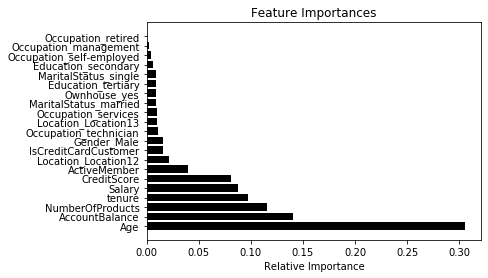

In [31]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='black')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [32]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [33]:
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)

[[4666    0]
 [   0 4722]]
[[1011  191]
 [  18 1128]]


In [34]:
metrics.f1_score(y_test, test_pred)

0.9152129817444219

### Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf = RandomForestClassifier(n_estimators=1000,max_depth=20)
rf.fit(X=X_train, y=y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
y_pred = rf.predict(X_train)
print("Accuracy for Train set:")
print(accuracy_score(y_train,y_pred))

y_pred_test = rf.predict(X_test)
print("Accuracy for Test set:")
print(accuracy_score(y_test,y_pred_test))

print("\n")

print("Recall for Train set:")
print(recall_score(y_train,y_pred,pos_label=1))

print("Recall for Test set:")
print(recall_score(y_test,y_pred_test,pos_label=1))

print("\n")

print("Precision for Train set:")
print(precision_score(y_train,y_pred,pos_label=1))

print("Precision for Test set:")
print(precision_score(y_test,y_pred_test,pos_label=1))

print("\n")

print("F1_Score for Test set:")
print(metrics.f1_score(y_test,y_pred_test,pos_label=1))

Accuracy for Train set:
1.0
Accuracy for Test set:
0.952725724020443


Recall for Train set:
1.0
Recall for Test set:
0.981675392670157


Precision for Train set:
1.0
Precision for Test set:
0.9259259259259259


F1_Score for Test set:
0.9529860228716646


### XGBoost

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier

In [39]:
XGB_model = XGBClassifier(n_estimators=1000, gamma=0.5,learning_rate=0.1,max_depth=25)
%time XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)
print(accuracy_score(y_test,y_pred))

Wall time: 50.8 s
0.9361158432708688


In [40]:
print(metrics.f1_score(y_test,y_pred))

0.9373956594323873
